# Advanced Machine Learning

## Data Understanding

In [1]:
# import libraries
import pandas as pd

In [2]:
# Load the Data set

customer_data = pd.read_csv('customer_churn_dataset.csv')

In [3]:
# Display first 5 rows of the dataset

customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Display all the Data types of Features(Columns)

customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Changing the DataType of TotalCharges to float from Object
import numpy as np

# Replacing any whitespace strings with NaN before converting to data type float
customer_data['TotalCharges'] = customer_data['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

# Converting the 'TotalCharges' to float
customer_data['TotalCharges'] = customer_data['TotalCharges'].astype(float)

# Checking the data type after conversion
customer_data['TotalCharges'].dtype


dtype('float64')

In [6]:
# Checking for missing values
missing_values = customer_data.isnull().sum()

missing_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Dropping the missing values in TotalCharges
customer_data = customer_data.dropna()

In [8]:
# Descriptive statistics for numerical columns
data_description = customer_data.describe()

data_description

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Selecting only numeric columns for the correlation matrix
numeric_columns = customer_data.select_dtypes(include=['float64', 'int64'])

# Checking for correlations with the 'Churn' variable
correlation_matrix = numeric_columns.corr()

correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [10]:
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Findings after Data Exploration

- There are No Missing Values in the Dataset
- 16% of the customers are Senior Citizens
- Tenure ranges from 0 to 72 months with the average median of 29 months
- Monthly Charges ranges from 18$ to 72$, with an averag of around 64$
- The Numerical Features have low correlation with each other. MonthlyCharges has positive correlation with SeniorCitizen and tenure which suggets that Customers(SeniorCitizens) with longer tenures have higher monthlycharges.

## Data Preparation

In [11]:
# Dropping the duplicates

customer_data = customer_data.drop_duplicates()

customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
# Dropping Unnecessary Features(Columns)

customer_data = customer_data.drop(['customerID'], axis=1)

# removed customerID as it is not useful while making predictions

customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Creating new Features

# LifeTimeValue
customer_data["LifeTimeValue"] = customer_data['TotalCharges'] / (customer_data['tenure'] + 1)
# added 1 to tenure to avoid output 0 incase any rows has 0 tenure 

# Usage Trend
customer_data["usageTrend"] = customer_data['MonthlyCharges'] - customer_data['MonthlyCharges'].shift(1).fillna(0)
# Code Explanation
    # customer_data["usageTrend"] : Creates a new Feature(Column)
    # customer_data['MonthlyCharges'] : Selects the column
    # customer_data['MonthlyCharges'].shift(1).fillna(0) : Shifts the values down in Feature(Column) by 1
        # Prev: MonthlyCharges=[29.85, 56.95, 53.85, 42.30, 70.70]
        # New: MonthlyCharges=[0, 29.85, 56.95, 53.85, 42.30, 70.70]
            # Result: usageTrend=[29.85-0, 56.95-29.85, 53.85-56.95, 42.30-53.85, 70.70-42.30]
                # Result: usageTrend=[29.85, 27.10, -3.10, -11.55, 28.40]

customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,LifeTimeValue,usageTrend
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,14.925000,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,53.985714,27.10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,36.050000,-3.10
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.016304,-11.55
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50.550000,28.40


In [14]:
# List of categorical columns
categorical_columns = customer_data.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in {col}: {customer_data[col].unique()}")

Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['No' 'Yes']


In [15]:
# List of numerical columns
numerical_columns = customer_data.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Descriptive statistics for numerical columns
print(customer_data[numerical_columns].describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  \
count    7032.000000  7032.000000     7032.000000   7032.000000   
mean        0.162400    32.421786       64.798208   2283.300441   
std         0.368844    24.545260       30.085974   2266.771362   
min         0.000000     1.000000       18.250000     18.800000   
25%         0.000000     9.000000       35.587500    401.450000   
50%         0.000000    29.000000       70.350000   1397.475000   
75%         0.000000    55.000000       89.862500   3794.737500   
max         1.000000    72.000000      118.750000   8684.800000   

       LifeTimeValue   usageTrend  
count    7032.000000  7032.000000  
mean       59.083067     0.015024  
std        30.514438    42.276564  
min         9.183333   -97.650000  
25%        26.225944   -29.700000  
50%        61.070387    -0.100000  
75%        84.877538    29.850000  
max       118.969863    98.900000  


In [16]:
# Encoding

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["gender", "Contract"]
categorical_cols


# Initialize LabelEncoder

label_encode = LabelEncoder()

# Apply Label Encoding
for col in categorical_cols:
    customer_data[col] = label_encode.fit_transform(customer_data[col])

# Check the resulting dataframe
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,LifeTimeValue,usageTrend
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,0,Yes,Electronic check,29.85,29.85,No,14.925000,29.85
1,1,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,1,No,Mailed check,56.95,1889.50,No,53.985714,27.10
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,0,Yes,Mailed check,53.85,108.15,Yes,36.050000,-3.10
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,1,No,Bank transfer (automatic),42.30,1840.75,No,40.016304,-11.55
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,0,Yes,Electronic check,70.70,151.65,Yes,50.550000,28.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,1,Yes,Mailed check,84.80,1990.50,No,79.620000,63.65
7039,0,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,1,Yes,Credit card (automatic),103.20,7362.90,No,100.861644,18.40
7040,0,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,0,Yes,Electronic check,29.60,346.45,No,28.870833,-73.60
7041,1,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,0,Yes,Mailed check,74.40,306.60,Yes,61.320000,44.80


In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'LifeTimeValue']
scaled_data = customer_data[scale_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(customer_data[scale_cols])

# Initialize the MinMaxScaler
minMax_scaler = MinMaxScaler()

# Fit and transform the data
minMax_scaled = minMax_scaler.fit_transform(customer_data[scale_cols])

# Check scaled data
print(scaled_data)
print(minMax_scaled)

[[-1.28024804 -1.16169394 -0.99419409 -1.44722332]
 [ 0.06430269 -0.26087792 -0.17373982 -0.1670591 ]
 [-1.23950408 -0.36392329 -0.95964911 -0.75487886]
 ...
 [-0.87280842 -1.17000405 -0.85451414 -0.99016673]
 [-1.15801615  0.31916782 -0.87209546  0.07331259]
 [ 1.36810945  1.35793167  2.01234407  1.41168297]]
[[0.         0.11542289 0.0012751  0.05229846]
 [0.46478873 0.38507463 0.21586661 0.40808632]
 [0.01408451 0.35422886 0.01031041 0.24471733]
 ...
 [0.14084507 0.11293532 0.03780868 0.17932528]
 [0.04225352 0.55870647 0.03321025 0.47489129]
 [0.91549296 0.86965174 0.78764136 0.84685602]]


In [18]:
# Imbalanced Data Handling

from imblearn.over_sampling import SMOTE

numerical_columns = customer_data.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Separate features and target variable
X = customer_data.drop('Churn', axis=1)
y = customer_data['Churn']

# Select numerical columns only for features
X = X.select_dtypes(include=['int32', 'int64', 'float64'])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balance of the target variable after SMOTE
y_resampled.value_counts()

Churn
No     5163
Yes    5163
Name: count, dtype: int64

## EDA

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


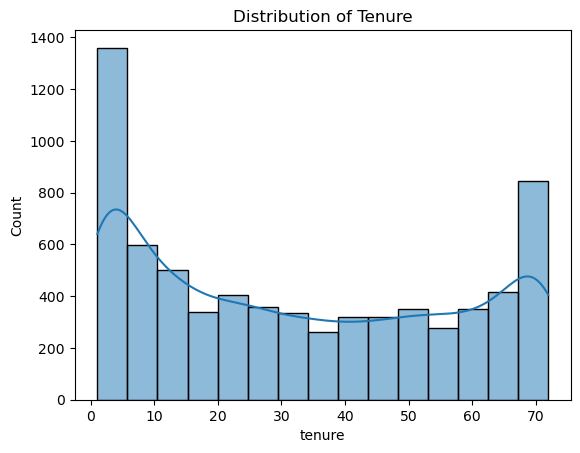

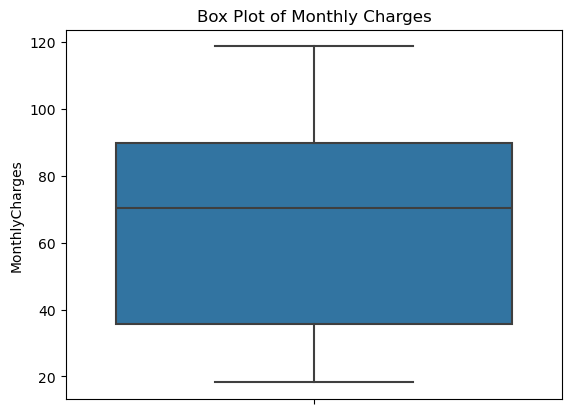

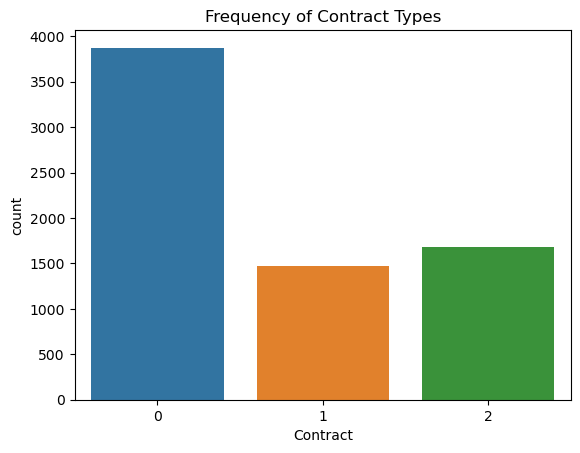

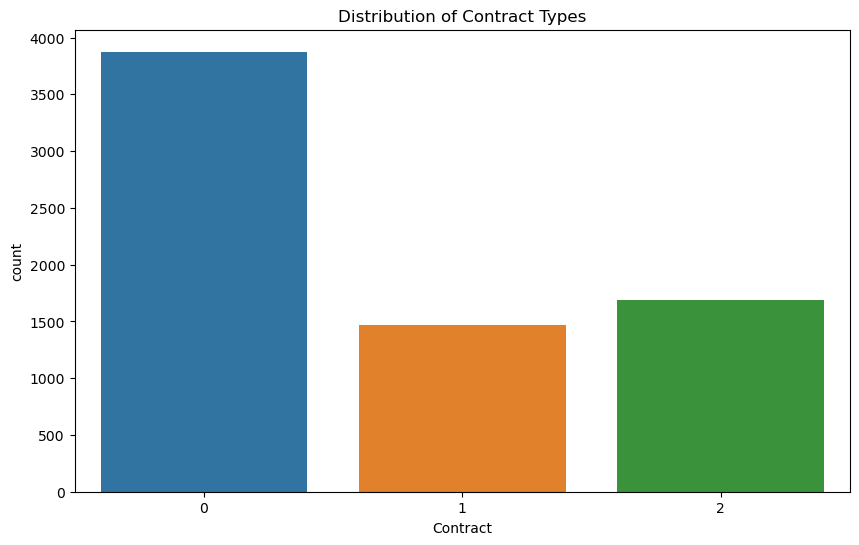

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics for numerical features
numerical_desc = customer_data.describe()

# Histogram for 'tenure'
sns.histplot(customer_data['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.show()

# Box plot for 'MonthlyCharges'
sns.boxplot(y=customer_data['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.show()

# Bar plot for 'Contract'
sns.countplot(x='Contract', data=customer_data)
plt.title('Frequency of Contract Types')
plt.show()


# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=customer_data)
plt.title('Distribution of Contract Types')
plt.show()

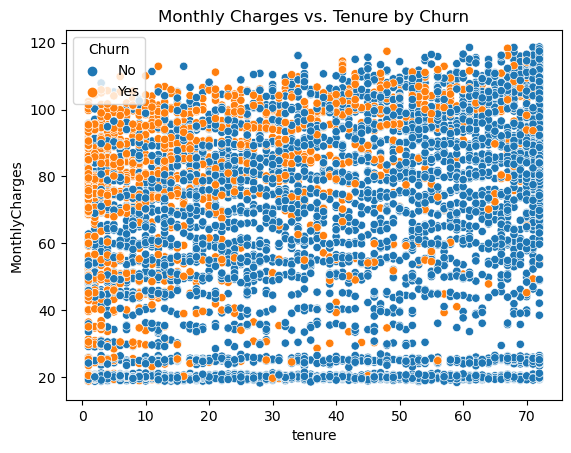

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


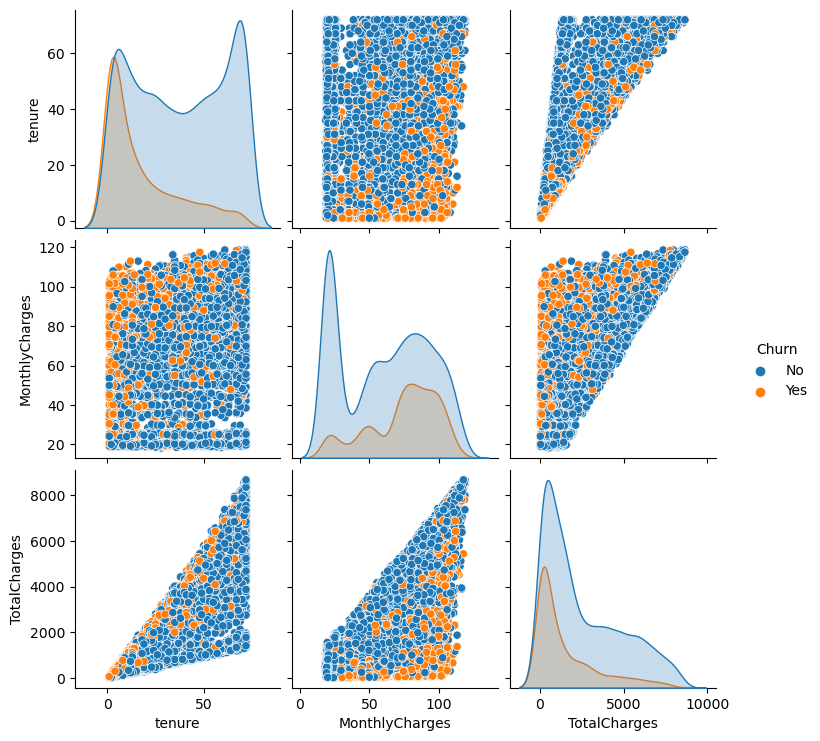

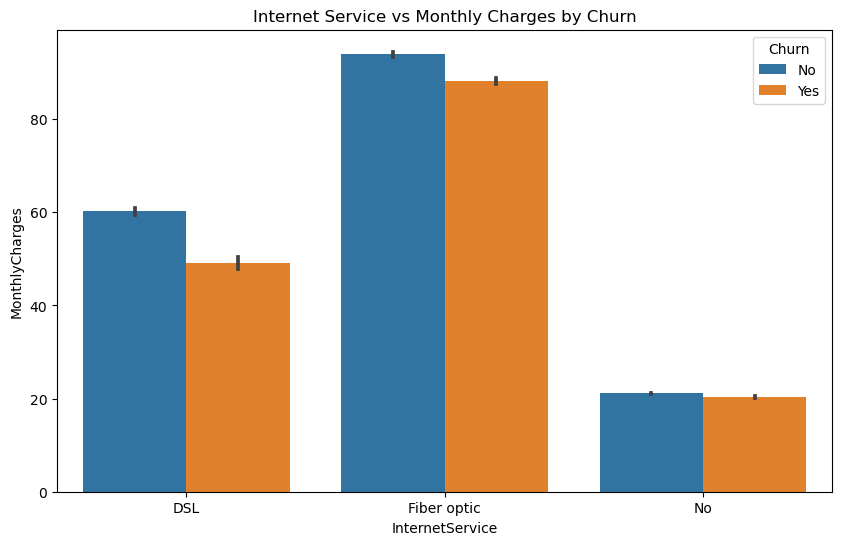

In [20]:
# Scatter plot between 'MonthlyCharges' and 'tenure' colored by 'Churn'
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=customer_data)
plt.title('Monthly Charges vs. Tenure by Churn')
plt.show()

# Pair plot for numerical features
sns.pairplot(customer_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

# Grouped bar plot for 'Contract' vs. 'Churn'
plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=customer_data)
plt.title('Internet Service vs Monthly Charges by Churn')
plt.show()

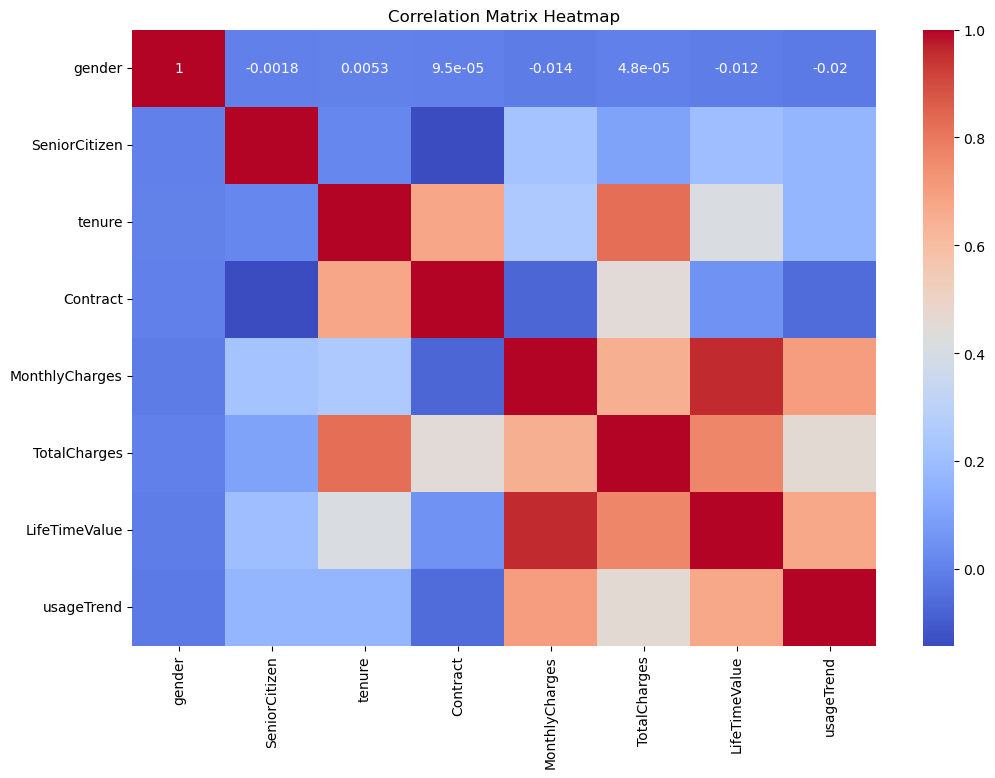

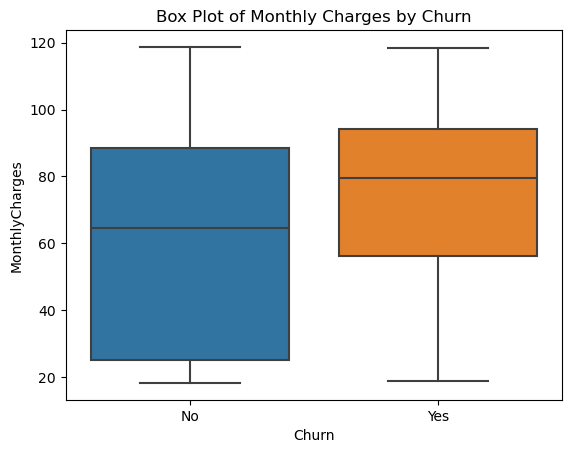

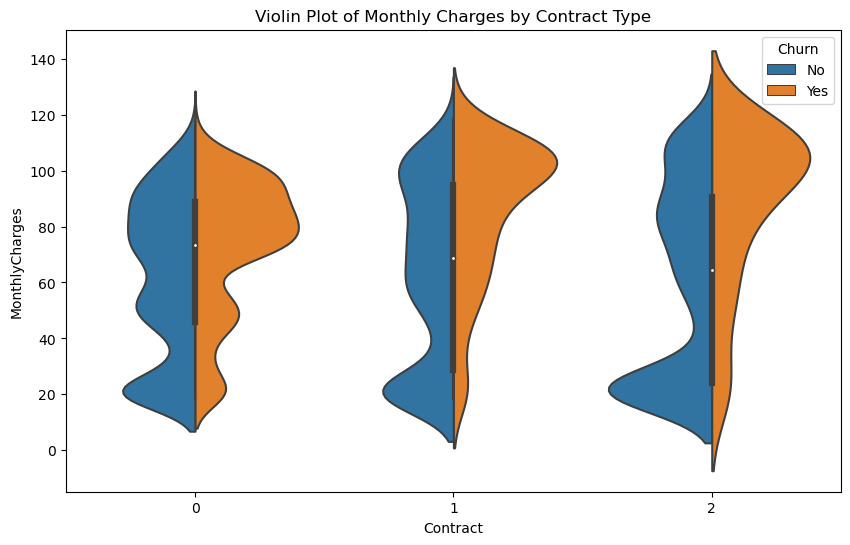

In [21]:
# Heatmap of the correlation matrix
corr_matrix = customer_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Box plot for numerical features grouped by 'Churn'
sns.boxplot(x='Churn', y='MonthlyCharges', data=customer_data)
plt.title('Box Plot of Monthly Charges by Churn')
plt.show()

# Violin plot to visualize the distribution of Monthly Charges by Contract type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=customer_data, split=True)
plt.title('Violin Plot of Monthly Charges by Contract Type')
plt.show()


In [22]:
# Identifying highly correlated features
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1]  # Exclude self-correlations
high_corr = high_corr[high_corr > 0.8]
print("Highly correlated features:\n", high_corr)

Highly correlated features:
 LifeTimeValue   MonthlyCharges    0.957328
MonthlyCharges  LifeTimeValue     0.957328
tenure          TotalCharges      0.825880
TotalCharges    tenure            0.825880
dtype: float64


## Model Development

In [23]:
!pip install xgboost
!pip install tensorflow

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [25]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Get predicted probabilities for positive class
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log_proba):.4f}")
print(classification_report(y_test, y_pred))
print("\n")


Logistic Regression
Accuracy: 0.7721
ROC AUC: 0.8535
              precision    recall  f1-score   support

          No       0.82      0.71      0.76      1563
         Yes       0.74      0.84      0.78      1535

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098





In [26]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Get predicted probabilities for positive class
y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]

print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_dt_proba):.4f}")  # Use y_pred_dt_proba here
print(classification_report(y_test, y_pred_dt))
print("\n")

Decision Tree
Accuracy: 0.7666
ROC AUC: 0.7669
              precision    recall  f1-score   support

          No       0.78      0.74      0.76      1563
         Yes       0.75      0.79      0.77      1535

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098





In [27]:
rndmCf = RandomForestClassifier(random_state=42)
rndmCf.fit(X_train, y_train)

y_pred_rndmCf = rndmCf.predict(X_test)

# Get predicted probabilities for positive class
y_pred_rndmCf_proba = rndmCf.predict_proba(X_test)[:, 1]

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rndmCf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rndmCf_proba):.4f}")  
print(classification_report(y_test, y_pred_rndmCf))
print("\n")

Random Forest
Accuracy: 0.8115
ROC AUC: 0.8907
              precision    recall  f1-score   support

          No       0.84      0.77      0.80      1563
         Yes       0.78      0.86      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098





In [28]:
gradientB = GradientBoostingClassifier(random_state=42)
gradientB.fit(X_train, y_train)

y_pred_gradientB = gradientB.predict(X_test)

# Get predicted probabilities for positive class
y_pred_gradientB_proba = gradientB.predict_proba(X_test)[:, 1]

print("Gradient Boosting")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gradientB):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gradientB_proba):.4f}")  
print(classification_report(y_test, y_pred_gradientB))
print("\n")

Gradient Boosting
Accuracy: 0.7899
ROC AUC: 0.8688
              precision    recall  f1-score   support

          No       0.84      0.73      0.78      1563
         Yes       0.75      0.85      0.80      1535

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098





In [29]:
xg_boost = xgb.XGBClassifier(random_state = 42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder with y_train
label_encoder.fit(y_train)

# Transform both y_train and y_test
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit with encoded y_train
xg_boost.fit(X_train, y_train_encoded)

# Predict using X_test
y_pred_xg = xg_boost.predict(X_test)

# Get predicted probabilities for positive class
y_pred_xg_proba = xg_boost.predict_proba(X_test)[:, 1]

print("XGBoost")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xg):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, y_pred_xg_proba):.4f}")
print(classification_report(y_test_encoded, y_pred_xg))

XGBoost
Accuracy: 0.8037
ROC AUC: 0.8818
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1563
           1       0.78      0.85      0.81      1535

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



In [30]:
# Neural Network

#Conveerting target variable (y_train and y_test) is binary (either 0 or 1) and not strings like 'No' and 'Yes'
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Neural Network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print(f"Neural Network - Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}, ROC AUC: {roc_auc_score(y_test, y_pred_nn):.4f}")
print(classification_report(y_test, y_pred_nn))

Epoch 1/10


c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5953 - loss: 9.7110 - val_accuracy: 0.7179 - val_loss: 1.4241
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6722 - loss: 3.0627 - val_accuracy: 0.6808 - val_loss: 1.2062
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - loss: 2.5682 - val_accuracy: 0.6378 - val_loss: 2.3791
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6809 - loss: 2.2999 - val_accuracy: 0.6827 - val_loss: 1.0277
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6888 - loss: 2.6002 - val_accuracy: 0.7256 - val_loss: 1.9566
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6954 - loss: 2.1496 - val_accuracy: 0.7595 - val_loss: 0.6330
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7086 - loss: 1.7527 - val_accuracy: 0.7153 - val_loss: 0.8479
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6990 - loss: 1.7696 - val_accuracy: 0.6946 - val_

## Model Evaluation

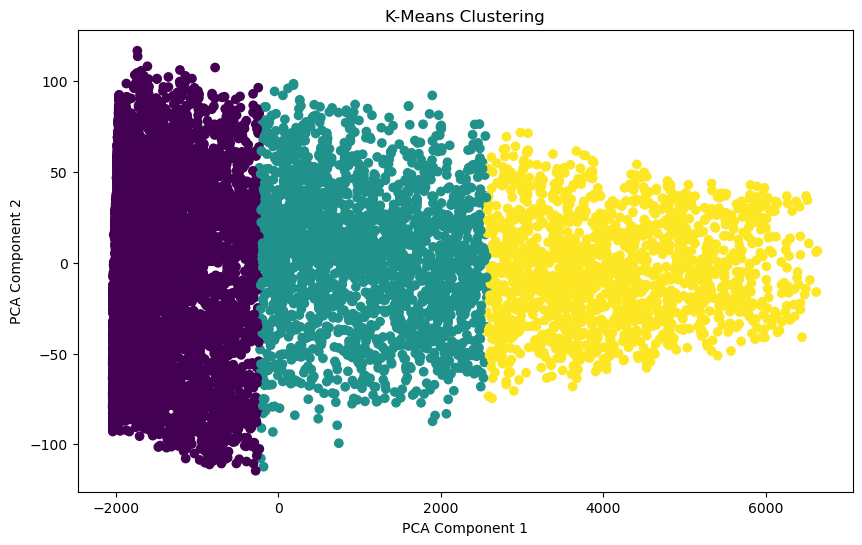

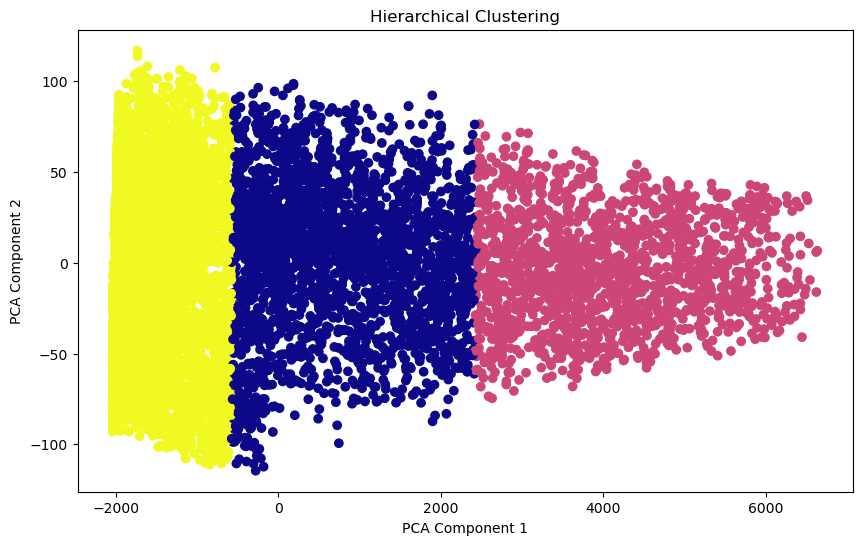

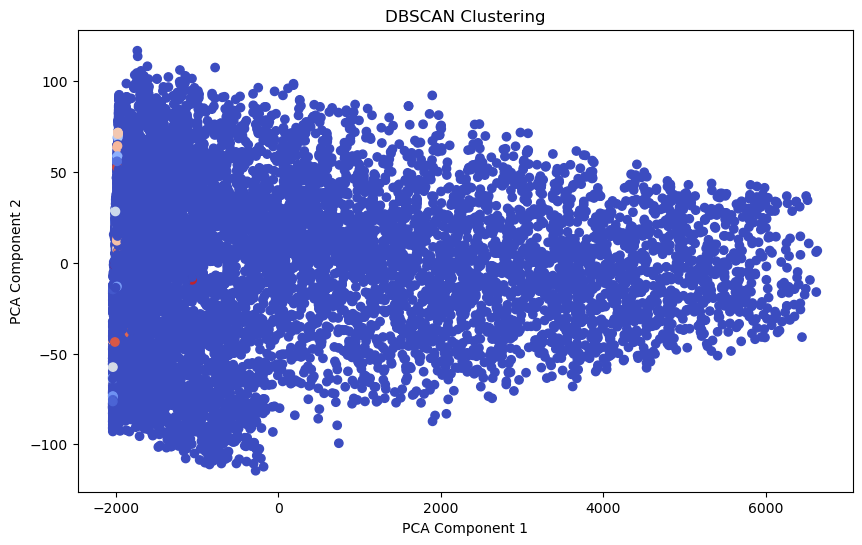

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='plasma', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='coolwarm', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is the classifier
k = 5
cv_scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=k, scoring='accuracy')

print(f"{k}-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

5-Fold Cross-Validation Accuracy: 0.7724 ± 0.0306


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[10, 50], # Number of Trees
    'max_depth':[None, 10], # Max Depth of the trees
    'min_samples_split':[2] # Min numbers of samples, required to split an internal node
}

# Note: I was Terminated Worker Error all the time so i reduced the param_grid values so that the error is solved and i get the output in local

grid_search = GridSearchCV(estimator=rndmCf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END .max_depth=10, min_samples_spl

In [34]:
## Eavluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print(f"Test Score : {test_score:.4f}")

Test Score : 0.8057


In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Silhouette Score
sil_score = silhouette_score(X_pca, kmeans_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Inertia (for K-Means)
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.4f}")

Silhouette Score: 0.6533
Davies-Bouldin Index: 0.4917
Inertia: 5050601414.3476


## Model Selection and Finalization

In [36]:
# Shap
%pip install shap

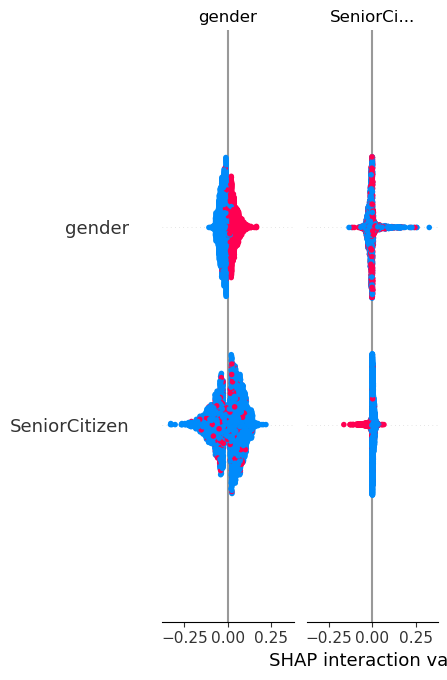

In [72]:
import shap

shap.initjs() # initializing JS libraries

# SHAP TreeExplainer
explainer = shap.TreeExplainer(rndmCf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

In [73]:
# SHAP values for a single prediction
shap.plots.force(explainer.expected_value[0], shap_values[:,0])

c:\Users\Dell\anaconda3\Lib\site-packages\shap\plots\_force.py:208: UserWarning: shap.plots.force is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.plots.force is slow for many thousands of rows, try subsampling your data.")


In [74]:
# Define feature names based on X_test.columns or as needed
feature_names = X_test.iloc[0:5].columns.tolist()  # Adjust this based on your actual data

# Plot decision plot with correct feature_names
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0:5], feature_names=feature_names, link='logit')

ValueError: The feature_names arg must include all features represented in shap_values.